# **INTRODUCTION**

Starting the business back in 2008, Airbnb's site now lists more than six million rooms, flats and houses in more than 81,000 cities across the globe. On average, two million people rest their heads in an Airbnb property each night – half a billion. I will be analyising the influence of Airbnb on New York City.

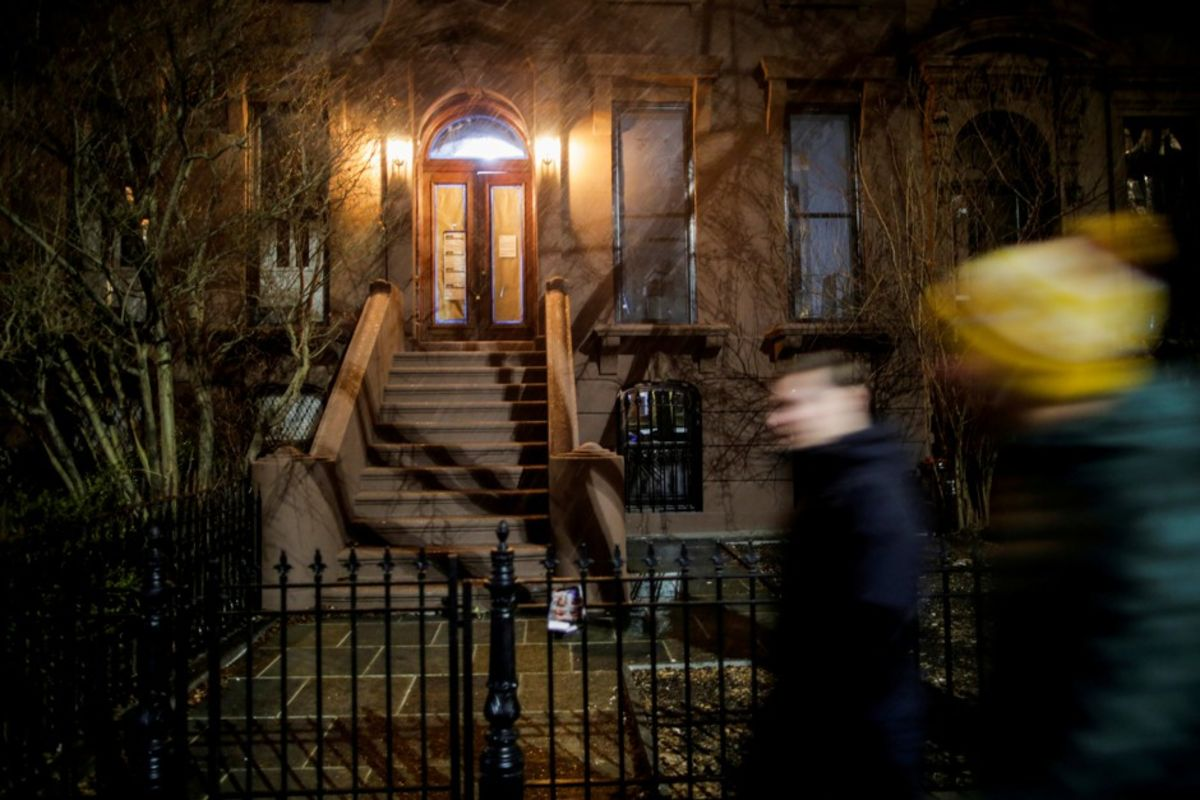

# **DATA EXPLORATION**

Here, I will download the dataset and libraries required. In addition, I will familiarise myslef with the dataset by researching on the topic and gaining insights. As highlighted in many articles, Airbnb supply concentrates in those parts of New York City with a young population.

**Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from PIL import Image
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


**Loading Dataset**

In [2]:
data = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Map of Airbnb locations in NYC**

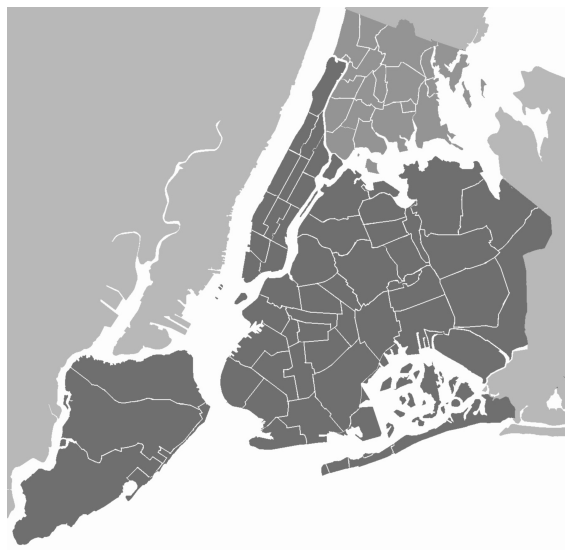

In [5]:
map_nyc = np.array(Image.open('/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png'))
plt.figure(figsize = (10, 10))
plt.imshow(map_nyc)
plt.axis('off')
plt.ioff()
plt.show()

The above map, although, already provided, shows the region of NYC where most Airbnbs are present. As observed, most of NYC has several Airbnbs. A tourist attraction, it is no suprise that Airbnb is highly successful in NYC.

# **DATA VISUALIZATION**

**Neigbourhood Groups**

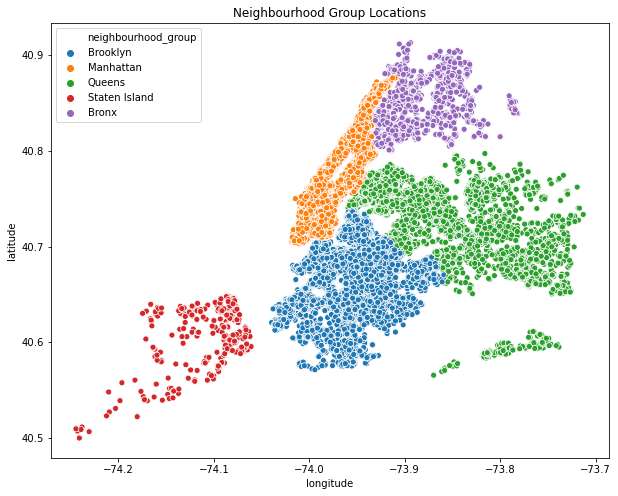

In [6]:
title = 'Neighbourhood Group Locations'
plt.figure(figsize = (10, 8))
sns.scatterplot(data.longitude, data.latitude, hue = data.neighbourhood_group).set_title(title)
plt.ioff()

Displaying it more simply below, the two charts distinguish neighbourhood groups in NYC. As observed in the chart above, majority Airbnbs lie in Manhattan followed by Brooklyn. These two places are popular tourist destinations and as shown in the chart below, attest that have higher count than Staten Island or Bronx.

**Correlation**

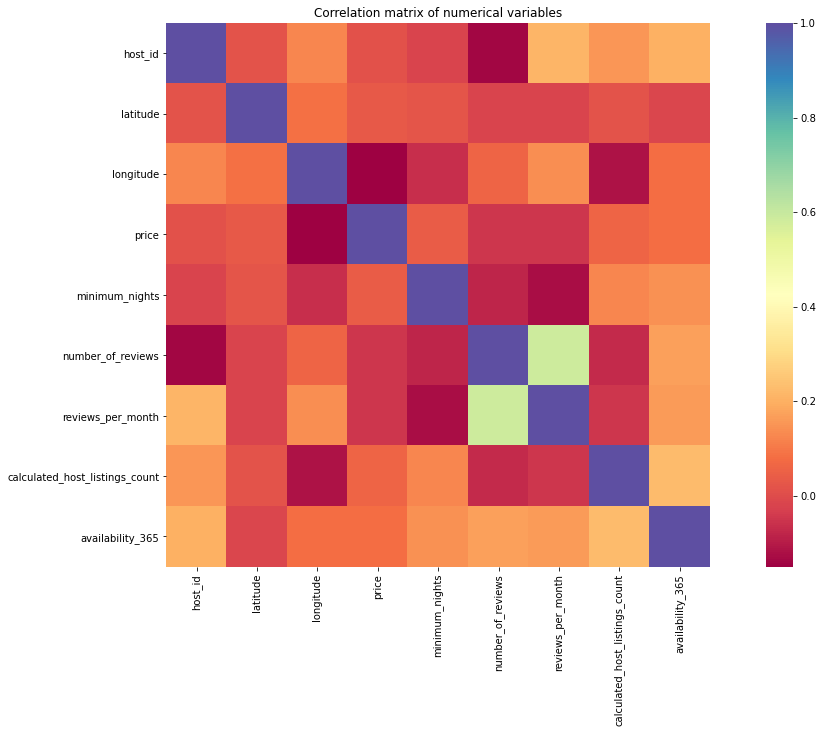

In [7]:
plt.figure(figsize = (20, 10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(), square = True, cmap = 'Spectral')
plt.title(title)
plt.ioff()

The correlation plot indicates the absence of a strong relationship between price and other factors.

In [8]:
fig = px.scatter_mapbox(data, lat = "latitude", lon = "longitude", color = "neighbourhood", size = "price", size_max = 30, opacity = .70, zoom = 12)
fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'NYC Neighbourhood', height = 750)
fig.show()

The above chart highlights the neighbourhood comparison. We can state that the popular neighbourhoods are too expensive for certain tourists, they might prefer staying at Airbnbs in neighbourhoods that are comparatively cheaper and closer to locations like Manhattan.

**Price of each neighbourhood**

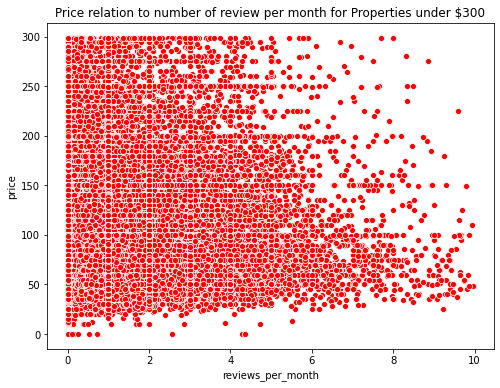

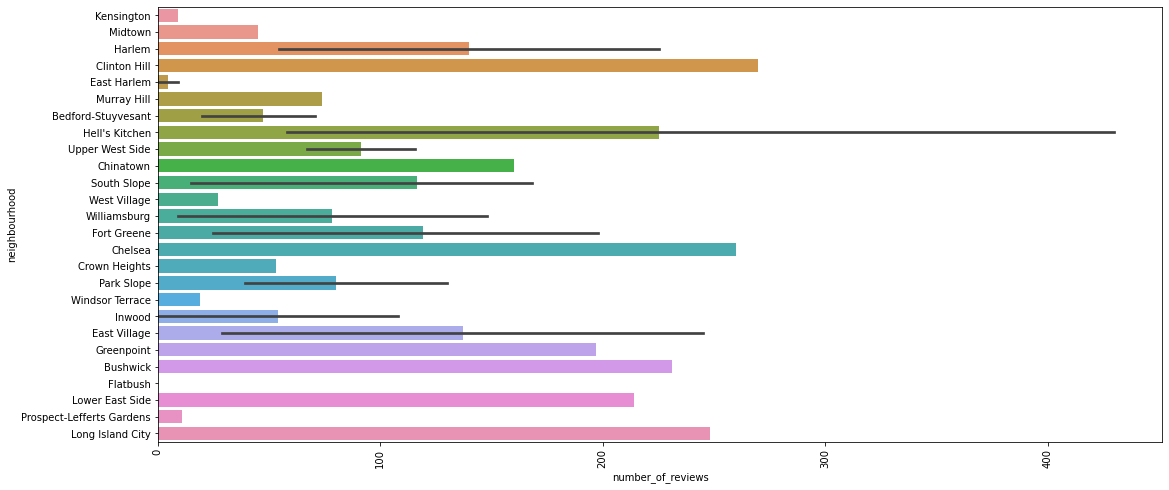

In [9]:
data2 = data.loc[(data['price'] < 300) & (data['reviews_per_month'] < 10)]
title = 'Price relation to number of review per month for Properties under $300'
f, ax = plt.subplots(figsize = (8, 6))
sns.scatterplot(x = 'reviews_per_month', y = 'price', data = data2, color = 'red')
plt.title(title)
plt.ioff()

plt.figure(figsize = (18, 8))
sns.barplot(x = data.number_of_reviews[:50], y = data.neighbourhood[:50])
plt.xticks(rotation = 90)
plt.show()

For low price airbnbs, there are some reviews. However, if the prices were high here, we'd see less reviews per month. Not very helpful to have such little reviews. Thus, we may conclude that there is no strong relationship between the reviews per month and price.

**Type of Rooms**

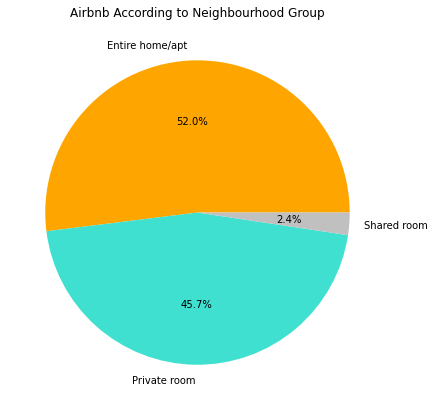

In [10]:
colors = ['orange', 'turquoise', 'silver']
labels = data.room_type.value_counts().index
values = data.room_type.value_counts().values
plt.figure(0, figsize = (7, 7))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group')
plt.show()

Here, we notice that not many prefer shared rooms. Families of more than 4 people might choose an entire home/apartment over a single room. Since the percentage of an entire home/apartments is greater, we can conclude that majority of tourists are a family of more than 2 people and the other portion, a private room would be for couples and single travellers. 

**10 Most & Least Expensive Airbnb Neighbourhoods**

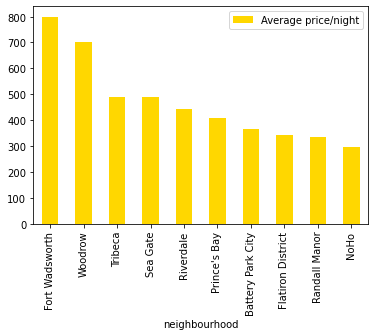

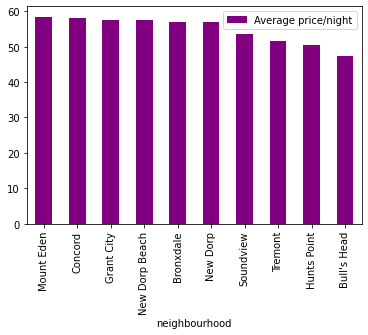

In [11]:
data3 = data.dropna(subset = ["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by = "price",
                                ascending = False).rename(index = str, columns = {"price": "Average price/night"}).head(10)

data3.plot(kind = 'bar', color = 'gold')
plt.show()

data3 = data.dropna(subset = ["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by = "price",
                                ascending = False).rename(index = str, columns = {"price": "Average price/night"}).tail(10)

data3.plot(kind = 'bar', color = 'purple')
plt.show()

There is a sharp drop in prices (around $200) after Tribeca. Rest both charts seem to have similar prices respectively. Tribeca being one of the fanciest localities of New York with trendy boutiques and restaurants alongside Washington Market Park and Hudson River Park,it draws tourists from all around the world. The old industrial buildings turned residential lofts are picture perfect locations for many people.

# **REGRESSION**

**Data Modification**

In [12]:
target_columns = ['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']
data_1 = data[target_columns]

#Below we encode values of the forst column since they are strings and cannot be converted to float for linear regression
data_1['room_type'] = data_1['room_type'].factorize()[0]
data_1['neighbourhood_group'] = data_1['neighbourhood_group'].factorize()[0]
data_1.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


**Train Test Split**

In [13]:
Y = data_1['price']
X = data_1.drop(['price'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1, random_state = 42)

**Regression function**

In [14]:
def regression_models(X_train, Y_train, X_test, Y_test):
#Linear Regression
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    y_pred = (lr.predict(X_test))
    print("LINEAR REGRESSION\nR-squared train score: ", lr.score(X_train, Y_train))
    print("R-squared test score: ", lr.score(X_test, Y_test))
#Lasso Regression
    las = Lasso(alpha = 0.0001)
    las.fit(X_train, Y_train)
    print("\nLASSO REGRESSION\nR-squared train score: ", las.score(X_train, Y_train))
    print("R-squared test score: ", las.score(X_test, Y_test))
#Decision Tree
    dec_tree = dtr(min_samples_leaf = 25)
    dec_tree.fit(X_train, Y_train)
    print("\nDECISION TREE\nR-squared train score: ", dec_tree.score(X_train, Y_train))
    print("R-squared test score: ", dec_tree.score(X_test, Y_test))
#Random Forest Regressor
    rfr = rfc()
    rfr.fit(X_train, Y_train)
    print("\nRANDOM FOREST REGRESSOR\nR-squared train score: ", rfr.score(X_train, Y_train))
    print("R-squared test score: ", rfr.score(X_test, Y_test))

In [15]:
regression_models(X_train, Y_train, X_test, Y_test)

LINEAR REGRESSION
R-squared train score:  0.04909951658626199
R-squared test score:  0.04820242927512808

LASSO REGRESSION
R-squared train score:  0.049099516585416
R-squared test score:  0.048202409203209284

DECISION TREE
R-squared train score:  0.17737633649975482
R-squared test score:  0.09118646006506925

RANDOM FOREST REGRESSOR
R-squared train score:  0.4698784229064879
R-squared test score:  0.06646216768916155


# **CONCLUSION**

We have built four models to predict the R-squared values. These model do not possess a strong predictive power to account for the variation in the dataset.

Observing the comparatively similar values of the training and test errors and the negligible difference between them indicates that the available features are not sufficient to construct a optimal model. This problem can be fixed by adding more data with higher prices. Therefore, this dataset is not enough to predict housing with high prices.
